In [1]:
import numpy as np
import yaml
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [4]:
class ML():

    def __init__(self, settings):
 
        self.settings = settings
        self._read_user_input()
     
    def _read_user_input(self): 
        with open(self.settings,'r') as file:
            inp = yaml.load(file, Loader=yaml.FullLoader) 
        inp_keys=[*inp.keys()]
        
        req=['data','ML method'] 
        
        for names in req:
            if names not in inp_keys:
                raise Exception(names +" not in input file")
            if inp[names] == None:
                raise Exception(names +" not in input file")

        self.datafile=inp['data']
        self.method=inp['ML method']
        self._read_data()

    def _read_data(self):
        self.X=pd.read_csv(self.datafile['input'])
        self.y=pd.read_csv(self.datafile['output'])
        self._ml_model()

    def _ml_model(self):
        if self.method['method']=='lasso':
            self.mod=Lasso()
        elif self.method['method']=='ridge':
            self.mod=Ridge()
        else:
            raise Exception("Enter a valid model")
        self._learning_curve()
        return self.mod
        

    def _learning_curve(self):
        self.cv = KFold(n_splits=10, random_state=1)
        self.train_size,self.train_score,self.test_score=learning_curve(self.mod,self.X,self.y,cv=self.cv,scoring='neg_mean_absolute_error')
        self.train_mean=-np.mean(self.train_score,axis=1)
        self.train_std=-np.std(self.train_score,axis=1)
        self.test_mean=-np.mean(self.test_score,axis=1)
        self.test_std=-np.std(self.test_score,axis=1)

    def plot_LC(self):
        plt.figure()
        plt.style.use('seaborn-ticks')
        plt.plot(self.train_size,self.train_mean, 'o-',label="Training score")
        plt.plot(self.train_size, self.test_mean, 'o-',label="Test score")
        plt.fill_between(self.train_size, self.train_mean - self.train_std, self.train_mean + self.train_std, alpha=0.2)
        plt.fill_between(self.train_size, self.test_mean - self.test_std, self.test_mean + self.test_std, alpha=0.2)
        plt.title("Learning Curve for {}".format(str(self.mod).split('(')[0]))
        plt.xlabel("Training Set Size")
        plt.ylabel("MAE")
        plt.legend(loc="best")
        plt.grid()
        plt.show()
    
    def predict(self,X_pre):
        X = self.X.to_numpy()
        y = self.y.to_numpy()
        kf=self.cv
        xp=pd.read_csv(X_pre)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            HBM_Train = self.mod.fit(X_train, y_train)
        self.prd=HBM_Train.predict(xp)
        return self.prd

## Testing

In [5]:
k=ML("settings.yaml")

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


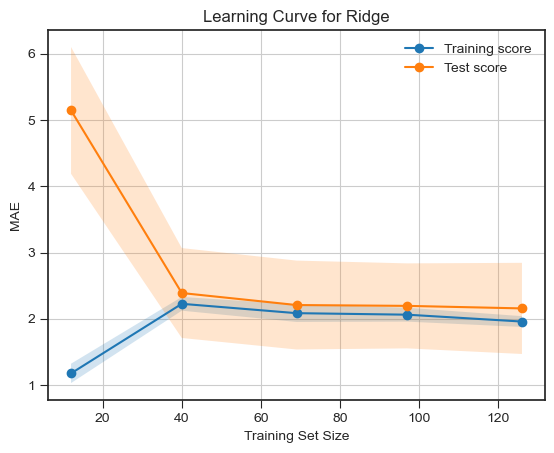

In [6]:
k.plot_LC()

In [7]:
k.predict("tst.csv")

array([[-45.05577922],
       [-42.20864056],
       [-37.92892393],
       [-27.87185926]])